### The problem is to make data set for two digit MNIST(handwritten number data) and train a neural network to identify them. 

In [9]:
# Importing necessary libraries

import os, sys, random
import matplotlib
import torch, torchvision
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image

%matplotlib inline

In [4]:
# Defining the root directories and the data follder to import data

root = os.getcwd()
data_folder = os.path.join(root, 'data')
if not os.path.isdir(data_folder):
    os.mkdir(data_folder)

In [6]:
# Device

use_gpu = torch.cuda.is_available()
use_metal = torch.backends.mps.is_available()

if use_gpu:
	device = torch.device("cuda")
elif use_metal:
    device = torch.device("mps")
else:
	device = torch.device("cpu")

print('Using Device: {}'.format(device))

Using Device: mps


In [11]:
# Training and test data

mnist = torchvision.datasets.MNIST(root=data_folder, transform=transforms.ToTensor(), train=True, download=True) 
mnist_test = torchvision.datasets.MNIST(root=data_folder, transform=transforms.ToTensor(), train=False, download=True) 

len(mnist), len(mnist_test)

(60000, 10000)

In [13]:
# Splitting the full mnist data set into train and validation data

mnist_train, mnist_val =  train_test_split(mnist, test_size=0.3, random_state=42)

len(mnist_train), len(mnist_val)

(42000, 18000)

In [15]:
train_loader = torch.utils.data.DataLoader(mnist_train , batch_size = 10, shuffle = False)
validation_loader = torch.utils.data.DataLoader(mnist_val , batch_size = 10, shuffle = False)
test_loader = torch.utils.data.DataLoader(mnist_test , batch_size = 10 , shuffle = False)

len(train_loader),len(validation_loader),len(test_loader)

(4200, 1800, 1000)

In [19]:
def disp_images(img_data, lab_data, img_num): 
    total = img_num
    if np.sqrt(img_num) != int(np.sqrt(img_num)):
        col = int(np.sqrt(img_num)) + 1 
    else:
        col = int(np.sqrt(img_num))
    rows = total // col
    if total % col != 0:
        rows += 1

    fig = plt.figure(1)
    for k in range(total):
        ax = fig.add_subplot(rows,col,k+1)
        ax.set_title(lab_data[k].item(), size=8, pad=0)
        ax.axis('off')
        ax.imshow(img_data[k][0,:], cmap='gray')

    plt.show()

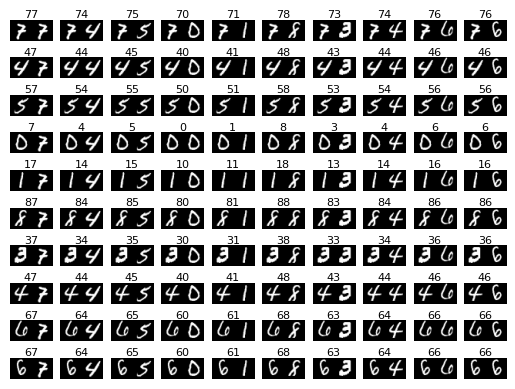

In [22]:
# Function to generate double digit mnist

def dataset_gen(tuple_data):
    images,labels = tuple_data
    new_images = torch.empty((images.size(0)*images.size(0), images.size(1), images.size(2), images.size(3)*2))
    new_labels = torch.empty(labels.size(0)*images.size(0))
    for i in range(images.size(0)):
        for j in range(images.size(0)):
            img = torch.cat((images[i],images[j]), dim=2)
            lab = labels[i]*10 + labels[j]
            new_images[i*10 + j] = img
            new_labels[i*10 + j] = lab

    return new_images.to(torch.float), new_labels.to(torch.long)

for idx,data in enumerate(train_loader):
    cat_img, cat_lab = dataset_gen(data)
    break

disp_images(cat_img, cat_lab, 100)
